In [186]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from itertools import count
from IPython import display
from matplotlib import animation
import seaborn as sns
from IPython.display import HTML

In [244]:
def plotter(xlist,f_new_list,f_not,interv):
    # create a figure and axes
    fig = plt.figure(figsize=(12,5))
    ax2 = plt.subplot(1,2,1)   
    ax2.set_xlim((0,1))
    ax2.set_ylim((-2,2))
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Phase Plane')

    txt_title = ax2.set_title('')
    pt1, = ax2.plot([], [], 'g', ms=8)
    line3, = ax2.plot([], [], 'b', lw=2,label='evolution')
    line4, = ax2.plot([], [], 'r', lw=0.5,label='initial')
    ax2.legend()
    # animation function. This is called sequentially
    def drawframe(n):
        line3.set_data(xlist[n],f_new_list[n] )
        line4.set_data(xlist[n],f_not[n] )
        max_point=np.argmax(f_new_list[n])
        pt1.set_data(xlist[n][max_point],f_new_list[n][max_point])
        return (line3,pt1)

    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, drawframe, frames=len(f_new_list), interval=interv, blit=True)
    return anim

In [247]:
##Wave Propagation
C=1
##CFL
CFL=0.5
#Grid
N=100
x=np.linspace(0,1,N+1)
x=x[0:-1]
dx=x[1]-x[0]
#Delta
dt=CFL*dx/(C)
#initial condition
sigma=0.01
f0=np.exp((-(x-0.5)**2)/sigma)
##FICS
xlist=[]
f_not=[]
f_new_list=[]
f_old=f0
Diff_f_old=np.zeros(len(f0))
for t in range(400):
    Diff_f_old[0]=(-f_old[-1]+f_old[1])/(2*dx)
    Diff_f_old[N-1]=(-f_old[-2]+f_old[0])/(2*dx)
    for j in range(1,N-1):
        Diff_f_old[j]=(-f_old[j-1]+f_old[j+1])/(2*dx)
    f_new=f_old-(C*dt)*Diff_f_old
    f_old=f_new
    if  t%5:
        f_not.append(f0)
        f_new_list.append(f_new)
        xlist.append(x)
#HTML(plotter(xlist,f_new_list,f_not,40).to_html5_video())

In [234]:
##Wave Propagation
C=1
##CFL
CFL=0.5
#Grid
N=100
x=np.linspace(0,1,N+1)
x=x[0:-1]
dx=x[1]-x[0]
#Delta
dt=CFL*dx/(C)
#initial condition
sigma=0.01
f0=np.exp((-(x-0.5)**2)/sigma)
##FTCS
xlist=[]
f_not=[]
f_new_list=[]
f_old=f0
Diff_f_old=np.zeros(len(f0))
f_bar=np.zeros(len(f0))
for t in range(400):
    f_bar[0]=(f_old[-1]+f_old[1])/(2)
    f_bar[N-1]=(f_old[-2]+f_old[0])/(2)
    Diff_f_old[0]=(-f_old[-1]+f_old[1])/(2*dx)
    Diff_f_old[N-1]=(-f_old[-2]+f_old[0])/(2*dx)
    for j in range(1,N-1):
        Diff_f_old[j]=(-f_old[j-1]+f_old[j+1])/(2*dx)
        f_bar[j]=(f_old[j-1]+f_old[j+1])/(2)
    f_new = f_bar - (C * dt) * Diff_f_old
    f_old = f_new ;
        
    if  t%1==0:
        f_not.append(f0)
        f_new_list.append(f_new)
        xlist.append(x)
#HTML(plotter(xlist,f_new_list,f_not,40).to_html5_video())

In [256]:
Diff_f_old = np.zeros([400,len(f0)])

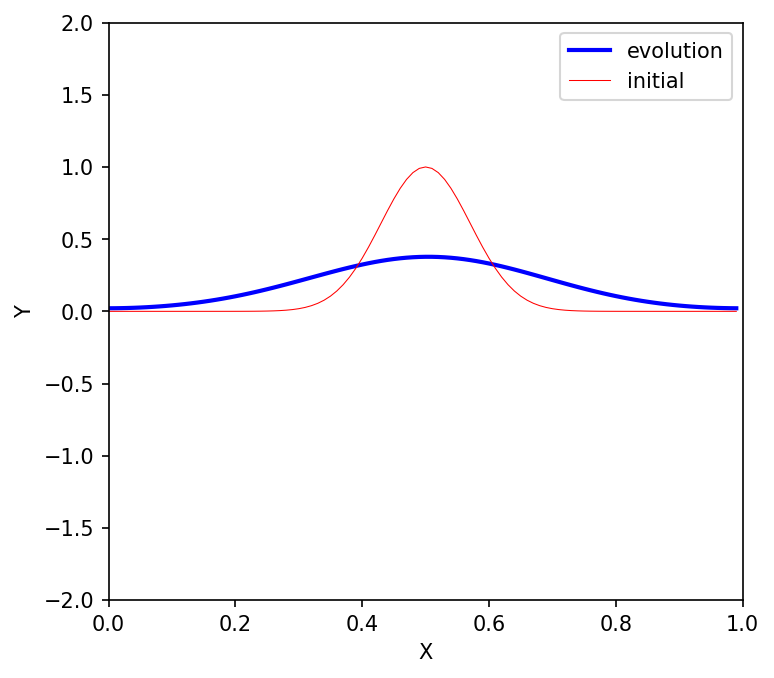

In [269]:
##Wave Propagation
C=1
##CFL
CFL=0.5
#Grid
N=100
x=np.linspace(0,1,N+1)
x=x[0:-1]
dx=x[1]-x[0]
#Delta
dt=CFL*dx/(C)
#initial condition
sigma=0.01
f0=np.exp((-(x-0.5)**2)/sigma)
##FTCS
xlist=[]
f_not=[]
f_new_list=[]
f_old=f0
f_new=np.zeros([400,len(f0)])
Diff_f_old=np.zeros(len(f0))
f_bar=np.zeros(len(f0))
for t in range(400):
    f_bar[0]=(f_old[-1]+f_old[1])/(2)
    f_bar[N-1]=(f_old[-2]+f_old[0])/(2)
    Diff_f_old[0]=(-f_old[-1]+f_old[1])/(2*dx)
    Diff_f_old[N-1]=(-f_old[-2]+f_old[0])/(2*dx)
    for j in range(1,N-1):
        Diff_f_old[j]=(-f_old[j-1]+f_old[j+1])/(2*dx)
        f_bar[j]=(f_old[j-1]+f_old[j+1])/(2)
    f_new[t] = f_bar - (C * dt) * Diff_f_old
    f_old = f_new[t] ;
    f_not.append(f0)
    xlist.append(x)
HTML(plotter(xlist,f_new,f_not,40).to_html5_video())